In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 20 , 4

In [2]:
from AJ_ML_Library import models_classification

/Users/zhanghsiungwei/anaconda/envs/tensor/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/zhanghsiungwei/anaconda/envs/tensor/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
train = pd.read_csv("data/train_modified_2.csv")
test = pd.read_csv("data/test_modified_2.csv")

In [5]:
train.shape , test.shape

((7381, 233), (11171, 232))

In [6]:
train.columns

Index([u'event_type 10', u'event_type 11', u'event_type 13', u'event_type 14',
       u'event_type 15', u'event_type 18', u'event_type 2', u'event_type 20',
       u'event_type 21', u'event_type 22',
       ...
       u'pattern_event', u'pattern_event_count', u'pattern_resource',
       u'pattern_resource_count', u'pattern_all', u'pattern_all_count',
       u'resource_count', u'event_count', u'occurence2_count_severity_type 1',
       u'occurence2_count_severity_type 2'],
      dtype='object', length=233)

In [7]:
train["fault_severity"].value_counts()

0.0    4784
1.0    1871
2.0     726
Name: fault_severity, dtype: int64

In [8]:
target = "fault_severity"
IDcol = "id"
output_colname = ["predict_0" , "predict_1" , "predict_2"]

In [9]:
train["source"] = "train"
test["source"] = "test"

In [10]:
data = pd.concat([train , test] , ignore_index=True)

In [11]:
data.shape

(18552, 234)

## Location Pattern

In [12]:
data["location"].value_counts().head()

832    184
121    184
929    183
157    177
917    168
Name: location, dtype: int64

In [13]:
locbool = data["location"] == 0

In [15]:
sum(locbool == True)

69

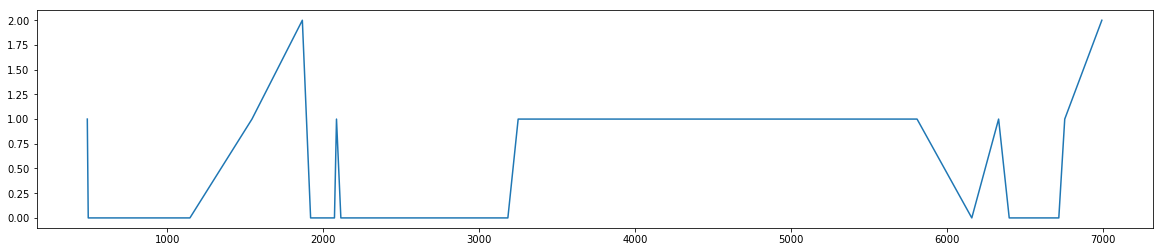

In [17]:
plt.plot(data.loc[locbool , "fault_severity"])

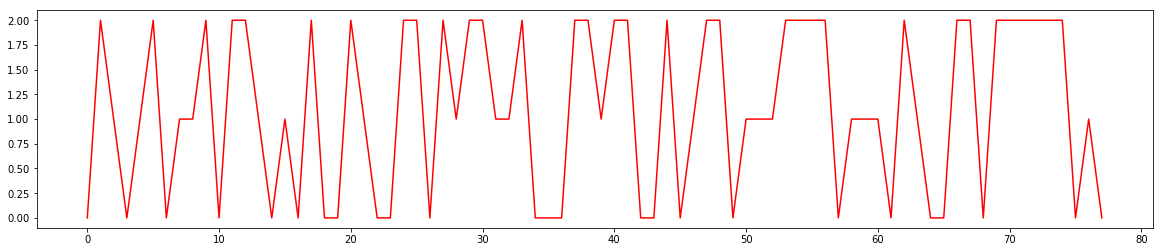

In [18]:
locbool = data["location"] == 121
plt.plot(range(0 , len(data.loc[locbool , "id"].values)) , data.loc[locbool , "fault_severity"].values , c="red")

In [20]:
len(data.loc[locbool , "id"].values)

184

In [21]:
len(data.loc[locbool])

184

In [26]:
data.loc[locbool , "id"].values.shape

(184,)

In [28]:
loc_counter = {}
def loc_count(x):
    if x["location"] in loc_counter:
        loc_counter[x["location"]] += 1
    else:
        loc_counter[x["location"]] = 1
    return loc_counter[x["location"]]
data["location_occurence_count"] = data[["id" , "location"]].apply(loc_count , axis = 1)

In [33]:
locbool = data["location"] == 832
data.loc[locbool , ["id" , "location" , "location_occurence_count" ,"location_counts"]]

,id,location,location_occurence_count,location_counts
61,142,832,1,184
164,411,832,2,184
206,498,832,3,184
239,594,832,4,184
268,679,832,5,184
365,924,832,6,184
455,1144,832,7,184
483,1222,832,8,184
572,1455,832,9,184
587,1495,832,10,184


In [34]:
data.loc[: , ["id" , "location" , "location_occurence_count"]].head(100)

,id,location,location_occurence_count
0,1,685,1
1,5,528,1
2,6,386,1
3,8,287,1
4,13,481,1
5,19,732,1
6,20,893,1
7,23,302,1
8,24,424,1
9,26,281,1


In [35]:
train = data.loc[data["source"] == "train"]
test = data.loc[data["source"] == "test"]
train.drop("source" , axis = 1 , inplace = True)
test.drop(["source" , "fault_severity"] , axis = 1 , inplace = True)

/Users/zhanghsiungwei/anaconda/envs/tensor/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhanghsiungwei/anaconda/envs/tensor/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [36]:
train.to_csv("data/train_modified_3.csv" , index = False)
test.to_csv("data/test_modified_3.csv" , index = False)